<a href="https://colab.research.google.com/github/Thien-Nhan-28/ProjectML/blob/main/21130506_21130461_projectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neural_network import MLPClassifier

In [ ]:
# Lấy dataset từ drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/project'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/project


In [ ]:
# Đọc dataset
datas = pd.read_csv('water_potability.csv')
# Tiền xử lý dữ liệu để bổ sung các dữ liệu còn thiếu
impute = SimpleImputer(missing_values = np.NaN, strategy = 'mean');
columns_to_impute = datas.columns[0:9]
datas[columns_to_impute] = impute.fit_transform(datas[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']])
X = datas.iloc[:,:-1];
y = datas.iloc[:,-1];
# Chia tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit


+---------------------+--------------------+---------------------------------------------------------------------------------------------------------+
|      Algorithm      |     Best_score     |                                               Best_params                                               |
+---------------------+--------------------+---------------------------------------------------------------------------------------------------------+
|    Neural Network   | 0.6306190598510145 | {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': 300, 'clf__max_iter': 100} |
| Logistic Regression | 0.602703808354977  |                                   {'clf__C': 1, 'clf__penalty': 'l2'}                                   |
|    Random Forest    | 0.6188419860908944 |  {'clf__max_depth': 9, 'clf__max_features': 'log2', 'clf__max_leaf_nodes': 9, 'clf__n_estimators': 100} |
+---------------------+--------------------+--------------------------------------------------

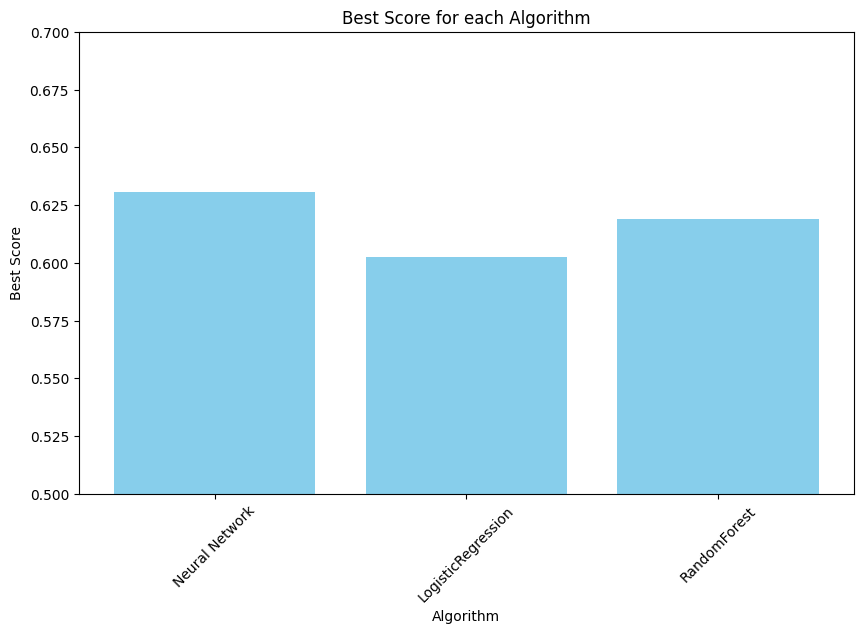

In [ ]:
# Dùng mảng để chưa tập hợp các thuật toán cùng với các tham số cần dùng để huân luyện (Tối ưu hóa code hơn)
arr_class = {
    'Neural Network' : {
        'model' : MLPClassifier(),
        'param_grid' : {
            'clf__hidden_layer_sizes' : [100,200,300],
            'clf__activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'clf__max_iter' : [10,100,1000],
            'clf__alpha' : [1e-3, 1e-4, 1e-5]
        }
    },
    'Logistic Regression': {
        'model' : LogisticRegression(),
        'param_grid' : {
          'clf__C' : [1,10,100,1000],
          'clf__penalty' : ['l1','l2'],
        }
      },
    'Random Forest' : {
        'model' : RandomForestClassifier(),
        'param_grid' : {
          'clf__n_estimators': [50, 100, 150],
          'clf__max_features': ['sqrt', 'log2'],
          'clf__max_depth': [6, 9],
          'clf__max_leaf_nodes': [6, 9]}
    }
}

best_score = []
# Dùng PrettyTable để hiển thị bảng kết quả
table = PrettyTable()
table.field_names=['Algorithm', 'Best_score','Best_params']
for model_name, config in arr_class.items() :
  # Dùng Pipeline để tiền xử lý dữ liệu (chuẩn hóa dữ liệu và chọn số đặc trưng quan trọng cần huấn luyện -> giúp tối ưu việc huân luyện)
  pipe = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('clf', config['model'])
  ])
  # Dùng GridSearchCV để tìm kiếm tham số tốt nhất cho từng mô hình
  grid_class = GridSearchCV(
      estimator = pipe,
      param_grid= config['param_grid'],
      scoring = 'accuracy',
      n_jobs = 4,
      cv = 5,
      refit = True,
      return_train_score= True
  )
  grid_class.fit(X_train, y_train)
  best_score.append(grid_class.best_score_)
  table.add_row([model_name, grid_class.best_score_, grid_class.best_params_])

print(table)

# Dữ liệu từ bảng kết quả
algorithm = ['Neural Network', 'LogisticRegression', 'RandomForest']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(algorithm, best_score, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Best Score')
plt.title('Best Score for each Algorithm')
plt.xticks(rotation=45)
plt.ylim(0.5, 0.7)
plt.show()


In [ ]:
# Lược đồ tiến hành tiền xử lý dữ liệu từ Pipeline
set_config(display="diagram")
pipe

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=4)),
                ('clf', RandomForestClassifier())])

<Figure size 1200x800 with 0 Axes>

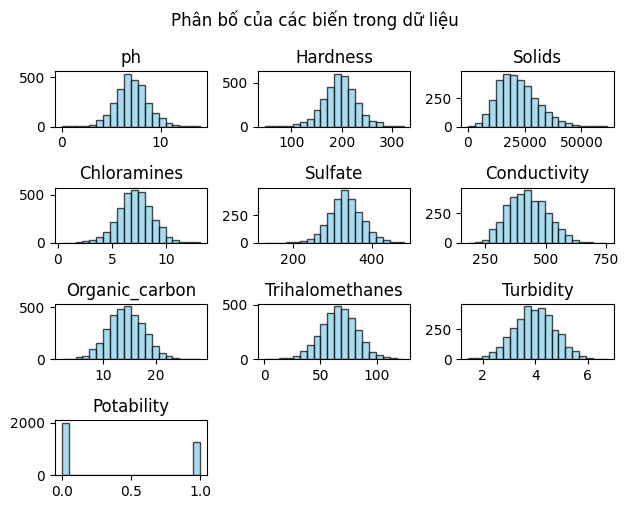

In [ ]:
datas = pd.read_csv('water_potability.csv')
# Vẽ biểu đồ phân bố cho các biến
plt.figure(figsize=(12, 8))
datas.hist(bins=20, color='skyblue', edgecolor='black', grid=False, alpha=0.7)
plt.tight_layout()
plt.suptitle('Phân bố của các biến trong dữ liệu', y=1.05)
plt.show()